# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import alpha_vantage

In [2]:
from alpha_vantage.timeseries import TimeSeries

# Key

In [3]:
key = open('APIkey.txt').read()

# Requirement 1 
### class ScriptData() - to fetch US Stock Data

In [4]:
ts = TimeSeries(key)

In [5]:
class ScriptData :
    def __init__(self) :
        self.data = None
        self.meta = None
        self.script_data = dict()
        self.original = None #Stores the originally fetched dataframe, before any operations on it

    def fetch_intraday_data(self, script) :
        self.script_data.setdefault(script, None)
        self.data, self.meta = ts.get_intraday(script, interval = '60min', outputsize = 'full')
        
    def convert_intraday_data(self, script) :
        #Converts The fetched time series object into a pandas dataframe.
        df = pd.DataFrame.from_dict(self.data, orient='columns')
        df = df.transpose()
        #df.insert(column = 'timestamp', loc = 0, value = df.index)
        df = df.reset_index()
        col = ['timestamp', 'open', 'high', 'low', 'close', 'volume'] # For re-defining the columns of our dataframe
        df.columns = col
        self.original = df.iloc[:, :]
        #res = list()
        #for i in range(len(df.index)) :
        #    res.append(i)
        #df.index = res
        self[script] = df
        
    def __getitem__(self, script) :
        return self.script_data[script]
        
    def __contains__(self, script) :
        if script in self.script_data :
            return True
        return False
    
    def __setitem__(self, script, df) :
        self.script_data[script] = df

In [6]:
script = ScriptData()

In [7]:
script.fetch_intraday_data('GOOGL')
script.convert_intraday_data('GOOGL')
script['GOOGL']

,timestamp,open,high,low,close,volume
0,2023-03-02 20:00:00,91.8000,91.9700,91.7500,91.8500,8934
1,2023-03-02 19:00:00,91.9100,91.9300,91.7500,91.8600,14837
2,2023-03-02 18:00:00,91.9700,92.0000,91.8700,91.8900,23458
3,2023-03-02 17:00:00,92.0000,92.1800,91.2321,92.0000,1157212
4,2023-03-02 16:00:00,91.9850,92.2750,91.8200,92.0400,6096610
...,...,...,...,...,...,...
603,2023-01-06 09:00:00,86.0301,87.8900,85.6000,87.3600,264501
604,2023-01-06 08:00:00,86.1500,86.1500,85.9800,86.0500,11133
605,2023-01-06 07:00:00,86.1500,86.1700,86.0700,86.0800,1359
606,2023-01-06 06:00:00,86.2000,86.2600,86.2000,86.2300,1677


In [8]:
script.fetch_intraday_data('AAPL')
script.convert_intraday_data('AAPL')
script['AAPL']

,timestamp,open,high,low,close,volume
0,2023-03-02 20:00:00,145.4300,145.6800,145.3000,145.6000,27905
1,2023-03-02 19:00:00,145.3800,145.5800,145.3200,145.4500,15973
2,2023-03-02 18:00:00,145.8100,145.8100,145.3000,145.3100,53040
3,2023-03-02 17:00:00,145.9200,146.0000,145.7100,145.8000,1197791
4,2023-03-02 16:00:00,145.8400,146.7100,145.5647,145.9101,9840011
...,...,...,...,...,...,...
619,2023-01-05 09:00:00,126.8568,127.6755,126.0580,126.7270,794836
620,2023-01-05 08:00:00,126.7370,127.6855,126.6771,127.4060,234127
621,2023-01-05 07:00:00,125.7684,126.8967,125.7684,126.7969,115484
622,2023-01-05 06:00:00,126.2078,126.7070,125.5987,125.7285,114561


In [9]:
'GOOGL' in script

True

In [10]:
'AAPL' in script

True

In [11]:
'NVDA' in script

False

# Requirement 2
### Defining a function indicator to define the moving average on the 'close' value of the data

In [12]:
def indicator1(df, timeperiod) :
    df_new = df.iloc[:, 0 : 1] #Getting only the timestamp column from the main dataframe
    df_new.insert(loc = 1, column = 'indicator', value = df['close'].rolling(timeperiod).mean())
    return df_new

In [13]:
indicator1(script['GOOGL'], timeperiod = 5)

,timestamp,indicator
0,2023-03-02 20:00:00,NaN
1,2023-03-02 19:00:00,NaN
2,2023-03-02 18:00:00,NaN
3,2023-03-02 17:00:00,NaN
4,2023-03-02 16:00:00,91.928
...,...,...
603,2023-01-06 09:00:00,86.140
604,2023-01-06 08:00:00,86.202
605,2023-01-06 07:00:00,86.165
606,2023-01-06 06:00:00,86.184


In [14]:
indicator1(script['AAPL'], timeperiod = 5)

,timestamp,indicator
0,2023-03-02 20:00:00,NaN
1,2023-03-02 19:00:00,NaN
2,2023-03-02 18:00:00,NaN
3,2023-03-02 17:00:00,NaN
4,2023-03-02 16:00:00,145.61402
...,...,...
619,2023-01-05 09:00:00,126.53674
620,2023-01-05 08:00:00,126.80686
621,2023-01-05 07:00:00,126.86878
622,2023-01-05 06:00:00,126.76894


# Requirement 3
### Defining a class Strategy to plot the time series graph of the recent 20 data

In [15]:
close_data_df1 = None #Used to get the signals
class Strategy :
    def __init__(self, script) :
        self.script = script
        dat = ScriptData()
        dat.fetch_intraday_data(script)
        dat.convert_intraday_data(script)
        self.df = dat[script]
        
    def get_script_data(self) :
        global close_data_df1
        close_data_df1 = indicator1(self.df, timeperiod = 5)
        self.df["close"] = self.df['close'].astype(float)
        close_data_df1.insert(loc = 2, column = 'close_data', value = self.df['close'])
        close_data_df1 = close_data_df1.dropna() #NaN values cause problem in plotting
        close_data_df = close_data_df1.iloc[0:20, :]
        close_data_df.plot(x='timestamp', y=["close_data", "indicator"], kind="line", figsize=(20, 10))
        plt.xticks(rotation = 30, ha = 'right')
        plt.show()
        
    def get_signals(self) :
        signal = []
        global close_data_df1
        for i in close_data_df1.index :
            if (close_data_df1['indicator'][i] > close_data_df1['close_data'][i]) :
                signal.append('BUY')
            else :
                signal.append('SELL')
        new_df =  close_data_df1.iloc[:, 0:1]
        new_df.insert(loc = 1, column = 'Signal', value = signal)
        re = []
        for i in range(0, len(new_df)) :
            re.append(i)
        new_df.index = re
        return filter_df(new_df)
        
        
def filter_df(df) :
    new_df = pd.DataFrame()
    time, sig = [], []
    val = df['Signal'][0]
    time.append(df['timestamp'][0])
    sig.append(df['Signal'][0])
    for i in df.index :
        if df['Signal'][i] == val :
            continue
        if val == 'BUY' :
            time.append(df['timestamp'][i])
            sig.append(df['Signal'][i])
            val = 'SELL'
        else :
            time.append(df['timestamp'][i])
            sig.append(df['Signal'][i])
            val = 'BUY'
    new_df.insert(loc = 0, column = 'timestamp', value = time)
    new_df.insert(loc = 1, column = 'Signal', value = sig)
    return new_df

In [16]:
strat = Strategy('NVDA')

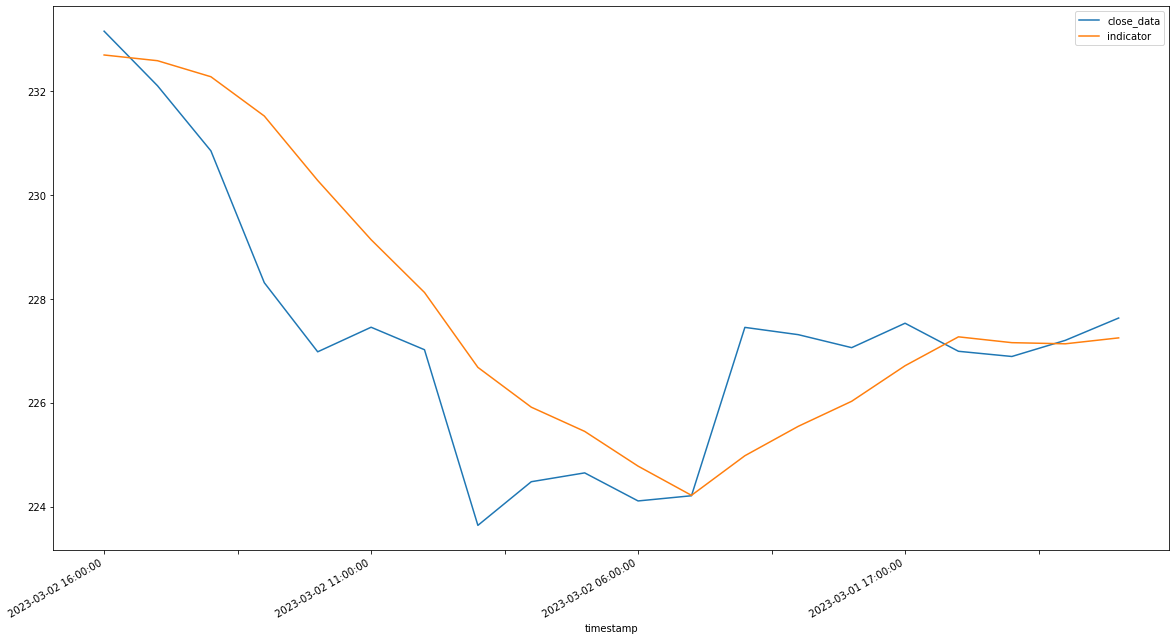

In [17]:
strat.get_script_data()

In [18]:
strat.get_signals()

,timestamp,Signal
0,2023-03-02 16:00:00,SELL
1,2023-03-02 15:00:00,BUY
2,2023-03-01 20:00:00,SELL
3,2023-03-01 16:00:00,BUY
4,2023-03-01 14:00:00,SELL
...,...,...
149,2023-01-05 16:00:00,BUY
150,2023-01-05 15:00:00,SELL
151,2023-01-05 13:00:00,BUY
152,2023-01-05 10:00:00,SELL


In [24]:
strat.get_signals().head(20)

,timestamp,Signal
0,2023-03-02 16:00:00,SELL
1,2023-03-02 15:00:00,BUY
2,2023-03-01 20:00:00,SELL
3,2023-03-01 16:00:00,BUY
4,2023-03-01 14:00:00,SELL
5,2023-03-01 11:00:00,BUY
6,2023-03-01 10:00:00,SELL
7,2023-03-01 07:00:00,BUY
8,2023-02-28 18:00:00,SELL
9,2023-02-28 12:00:00,BUY
